# 1. 
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input - string = “write write write all the number from from from 1 to 100”

Example output - 5

Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5



In [2]:
def longest_repeating_string(string):
    str_lst = string.split(' ')
    dct = {}
    for word in str_lst:
        if word not in dct:
            dct[word] = 1
        else:
            dct[word]+=1
        max_occ = max(dct.values())
    lon_rep_str = ""
    for i in dct:
        if dct[i] == max_occ:
            if len(i) > len(lon_rep_str):
                lon_rep_str = i
    return len(lon_rep_str)
    
            
    

In [3]:
test_cases = [
  ("write write write all the number from from from 1 to 100", 5),
  ("the quick brown fox jumps over the lazy dog", 3),
  ("I love Python", 6)
]
i = 1
for test_case in test_cases:
    string, expected_output = test_case
    actual_output = longest_repeating_string(string)
    i+=1
    print('actual_output:',actual_output,'  expected_output:',expected_output)

actual_output: 5   expected_output: 5
actual_output: 3   expected_output: 3
actual_output: 6   expected_output: 6


Question 2: -

Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }

Example output 1- YES

Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }

Example output 2 - NO

In [4]:
def check_valid_string(string):
    dct={}
    for i in string:
        if i in dct:
            dct[i]+=1
        else:
            dct[i]=1
    
    
    for value in dct.values():
        if value != dct[i]:
            return "NO"
    
    return "YES"

test_cases = [
  ("abc", "YES"),
  ("abcc", "NO"),
  ("Python", "YES")
]
i = 1
for test_case in test_cases:
    string, expected_output = test_case
    actual_output = check_valid_string(string)
    i+=1
    print('actual_output:',actual_output,'  expected_output:',expected_output)

actual_output: YES   expected_output: YES
actual_output: NO   expected_output: NO
actual_output: YES   expected_output: YES


Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert

that into properly structured data and return it in Excel format.

Note - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

Data Attributes - id: Identification Number - int num: Number of the

● Pokémon in the official Pokédex - int name: Pokémon name -

● string img: URL to an image of this Pokémon - string type:

● Pokémon type -string height: Pokémon height - float

● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given

● when transferred - string candy_count: the amount of candies required to evolve
- int

● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:

● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int

● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of

● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict

In [5]:
import pandas as pd
import json
import requests

In [6]:

url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'

# Fetch JSON data from the URL
response = requests.get(url)

# Convert JSON string to JSON object
json_obj = json.loads(response.text)

# Convert JSON object to pandas DataFrame
pokemon_df = pd.json_normalize(json_obj['pokemon'])

# Convert the dataframe and save it as excel
pokemon_df.to_excel('pokemon_data.xlsx')

Question 4 -

Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.

Link - https://data.nasa.gov/resource/y77d-th95.json

Note - Write code comments wherever needed for code understanding.

Sample Data -

Excepted Output Data Attributes

● Name of Earth Meteorite - string id - ID of Earth

● Meteorite - int nametype - string recclass - string

● mass - Mass of Earth Meteorite - float year - Year at which Earth

● Meteorite was hit - datetime format reclat - float recclong - float

● point coordinates - list of int

In [7]:
import numpy as np
url = 'https://data.nasa.gov/resource/y77d-th95.json'

# Fetch JSON data from the URL
response = requests.get(url)

# Convert JSON string to JSON object
json_obj = json.loads(response.text)

# Convert JSON object to pandas DataFrame
data_nasa = pd.DataFrame(json_obj)


##While iterating polar cordinaetes became nan that raises an error
data_nasa['geolocation'] = data_nasa['geolocation'].ffill()
for i in range(len(data_nasa)):
    data_nasa['geolocation'].loc[i] = data_nasa['geolocation'].loc[i]['coordinates']
    
    
# Convert the dataframe and save it as excel
data_nasa.to_excel('data_nasa.xlsx')

Question 5 -

Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

Note - Write proper code comments wherever needed for the code understanding

Excepted Output Data Attributes -

● id - int url - string

● name - string season

● - int number - int

● type - string airdate -

● date format airtime -

● 12-hour time format

● runtime - float

● average rating - float

● summary - string

● without html tags

● medium image link - string

● Original image link - string

In [8]:
# Function to transform the dataset as per the requirements
def transform(df):
    df['medium_image_link'] = ""
    df['original_image_link'] = ""
    for i in range(len(df)):
        df.airtime.loc[i] = datetime.strptime(df['airtime'].loc[i], '%H:%M').strftime('%I:%M %p')
        df.rating.loc[i] = df.rating.loc[i]['average']
        df.summary.loc[i] = BeautifulSoup(df['summary'].loc[i], 'html.parser').get_text()
        df['medium_image_link'].loc[i] += df.image.loc[i]['medium']
        df['original_image_link'].loc[i] += df.image.loc[i]['original']
    df = df.drop(['image','_links'],axis=1)
    return df

In [9]:
from datetime import datetime
import _strptime
from bs4 import BeautifulSoup
url = "https://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)

# Fetch JSON data from the URL
response = requests.get(url)

# Convert JSON string to JSON object
json_obj = json.loads(response.text)

# Extracting data

df = json_obj['_embedded']['episodes']

# Converting to pandas dataframe
df = pd.DataFrame(df)

# Transforming according to Expected output
df = transform(df)

#Save it for future use
df.to_excel('episodes.xlsx',index=False)




C:\Users\Raja.Balasubramani\AppData\Local\Temp\ipykernel_14092\282122233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.airtime.loc[i] = datetime.strptime(df['airtime'].loc[i], '%H:%M').strftime('%I:%M %p')
C:\Users\Raja.Balasubramani\AppData\Local\Temp\ipykernel_14092\282122233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rating.loc[i] = df.rating.loc[i]['average']
C:\Users\Raja.Balasubramani\AppData\Local\Temp\ipykernel_14092\282122233.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions 

Note 

1.Draw plots to demonstrate the analysis for the following questions for better visualizations.

2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all Pokemons whose spawn rate is less than 5%

● Get all Pokemons that have less than 4 weaknesses

● Get all Pokemons that have no multipliers at all

● Get all Pokemons that do not have more than 2 evolutions

● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

● Get all Pokemon who have more than two types of capabilities

C:\Users\Raja.Balasubramani\AppData\Local\Temp\ipykernel_14092\983700558.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_df.spawn_time[i] = pokemon_df.spawn_time[i-5]


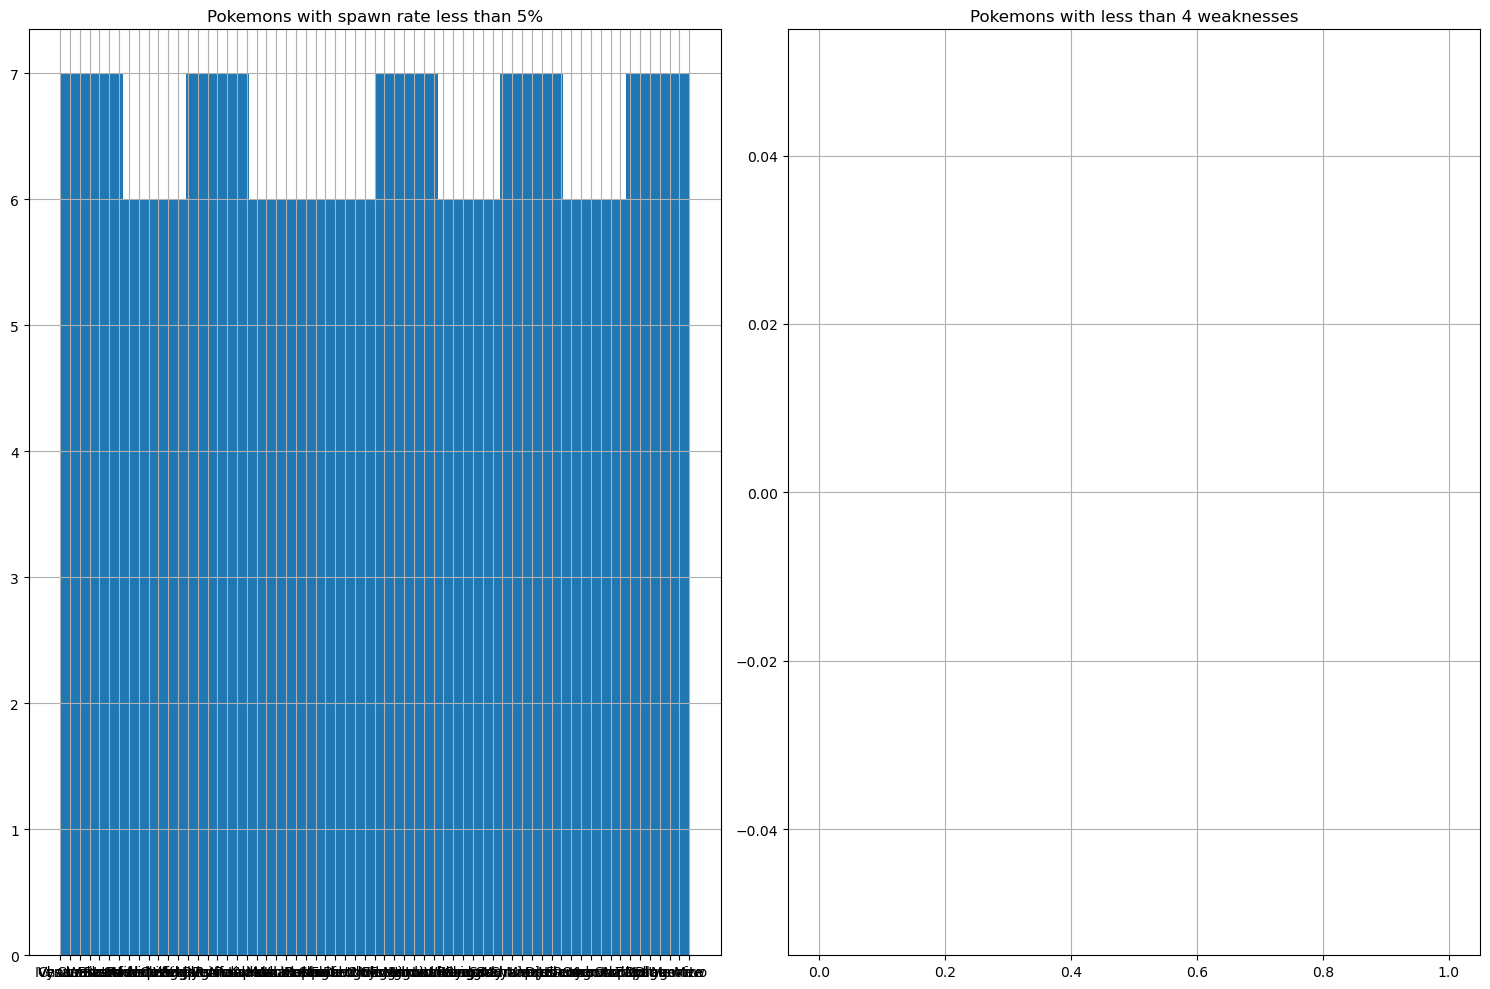

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file created in the previous question
pokemon_df = pd.read_excel('pokemon_data.xlsx')

# Convert 'spawn_time' column to string
pokemon_df['spawn_time'] = pokemon_df['spawn_time'].astype(str)

#In this dataset the nan values are in the form of string so fillna methods are not working so manually nan isfilled using below code
for i in range(len(pokemon_df)):
    if pokemon_df.spawn_time[i] == 'nan':
        pokemon_df.spawn_time[i] = pokemon_df.spawn_time[i-5]
    pokemon_df


# Get all Pokemons whose spawn rate is less than 5%
low_spawn_rate = pokemon_df[pokemon_df['spawn_chance'] < 0.05]

# Get all Pokemons that have less than 4 weaknesses
pokemon_df['num_weaknesses'] = pokemon_df['weaknesses'].apply(lambda x: len(x))
less_weak_pokemon = pokemon_df[pokemon_df['num_weaknesses'] < 4]

# Get all Pokemons that have no multipliers at all
no_multipliers = pokemon_df[pokemon_df['next_evolution'].isnull()]

# Get all Pokemons that do not have more than 2 evolutions
pokemon_df['num_evolutions'] = pokemon_df['next_evolution'].apply(lambda x: 0 if pd.isnull(x) else len(x))
less_evolutions = pokemon_df[pokemon_df['num_evolutions'] <= 2]

# all Pokemons whose spawn time is less than 300 seconds
pokemon_df['spawn_seconds'] = pokemon_df['spawn_time'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
short_spawn_time = pokemon_df[pokemon_df['spawn_seconds'] < 300]

# Get all Pokemon who have more than two types of capabilities
pokemon_df['num_types'] = pokemon_df['type'].apply(lambda x: len(x))
more_types = pokemon_df[pokemon_df['num_types'] > 2]

# Plot the insights
fig, axes = plt.subplots(1, 2, figsize=(15,10 ))
axes = axes.flatten()

low_spawn_rate['name'].hist(ax=axes[0])
axes[0].set_title('Pokemons with spawn rate less than 5%')

less_weak_pokemon['name'].hist(ax=axes[1])
axes[1].set_title('Pokemons with less than 4 weaknesses')



plt.tight_layout()
plt.show()


Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions for better visualizations

2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [11]:
# Reading the dataset
df = pd.read_excel('data_nasa.xlsx')

In [12]:
# Getting the year from YYYY:MM:DD
df['year'] = df['year'].apply(lambda x: str(x)[:4])

#Converting it into float to do operations
df['year'] = df['year'].astype(float)

# Getting all asteriods that fell before 2000
asteroids_before_2000 = df.name[df['year']<2000]

# Getting all the earth meteorites co-ordinates who fell before the year 1970
co_ordinates_1970 = df[['year','geolocation']][df['year']<1970]

# Getting all those whose mass was more than 10000kg
meteroids_kg = df.name[df['mass']>10000]

In [13]:
df = pd.read_excel('episodes.xlsx')

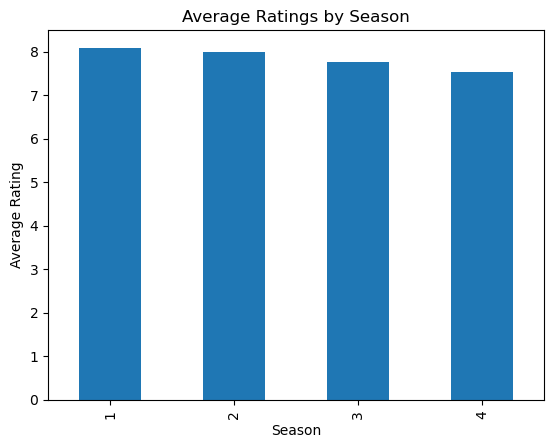

In [15]:
import matplotlib.pyplot as plt

# Get all the overall ratings for each season
season_ratings = df.groupby('season')['rating'].mean()

# Plot the ratings for all the seasons
season_ratings.plot(kind='bar')
plt.title('Average Ratings by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.show()

# Get all the episode names, whose average rating is more than 8 for every season
high_rated_episodes = df[df['rating'] > 8].groupby(['season', 'name'])['rating'].max()


# Get all the episode names that aired before May 2019
early_episodes = df.name[df['airdate'] < '2019-05-01']


# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = df.loc[df.groupby('season')['rating'].idxmax()][['season', 'name', 'rating']]
lowest_rated_episodes = df.loc[df.groupby('season')['rating'].idxmin()][['season', 'name', 'rating']]


# Get the summary for the most popular (ratings) episode in every season
most_popular_episodes = df.loc[df.groupby('season')['rating'].idxmax()][['season', 'name', 'summary']]



In [17]:
# Reading the data
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Looking for unique values in the col
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()


# Getting all the cars and their types that do not qualify for clean alternative fuel vehicle
not_qualified_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == "Not eligible due to low battery range"][['Make','Model']]

#Getting all TESLA cars with the model year, and model type made in Bothell City.
tesla_bothell = df[df['Make']=='TESLA'][df['City'] == 'Bothell'][['Model','Model Year','Electric Vehicle Type']]

# Getting all the cars that have an electric range of more than 100, and were made after 2015
range_100 = df[df['Electric Range'] >100][df['Model Year']>2015]

# Getting all the cars that have an electric range of more than 100, and were made after 2015
vechicles_per_city = df['Electric Vehicle Type'].groupby(df['City']).count()

# Drawing plots to show the distribution between city and electric vehicle type
Vechicle_type_city = df['City'].groupby(df['Electric Vehicle Type']).count()

C:\Users\Raja.Balasubramani\AppData\Local\Temp\ipykernel_14092\3040920076.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tesla_bothell = df[df['Make']=='TESLA'][df['City'] == 'Bothell'][['Model','Model Year','Electric Vehicle Type']]
C:\Users\Raja.Balasubramani\AppData\Local\Temp\ipykernel_14092\3040920076.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  range_100 = df[df['Electric Range'] >100][df['Model Year']>2015]


Text(0.5, 1.0, 'Vechicles present in each city')

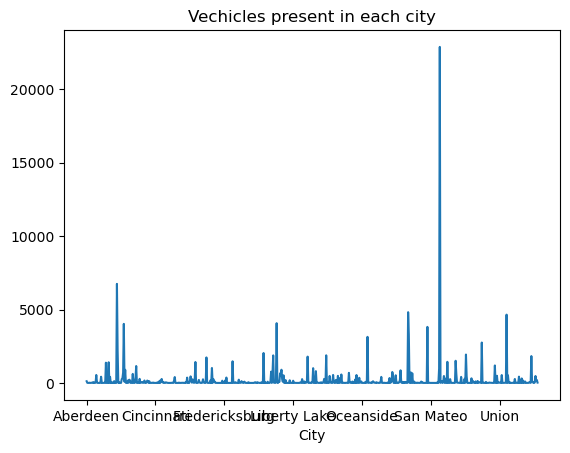

In [18]:
vechicles_per_city.plot()
plt.title("Vechicles present in each city")

Text(0.5, 1.0, 'Number of cars based on Vechicle Type')

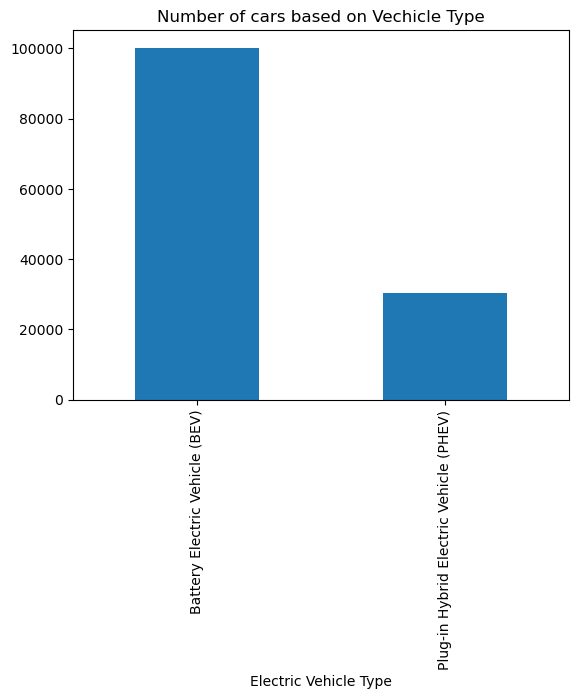

In [19]:
Vechicle_type_city.plot(kind = 'bar')
plt.title('Number of cars based on Vechicle Type')

In [20]:
import nltk

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Tag the words with their part-of-speech (POS) using NLTK's POS tagger
    tagged_words = pos_tag(words)

    # Initialize counts for verbs, nouns, pronouns, and adjectives
    counts = {
        'verbs': 0,
        'nouns': 0,
        'pronouns': 0,
        'adjectives': 0
    }

    # Iterate through tagged words and update the respective counts
    for word, tag in tagged_words:
        if tag.startswith('VB'):  # VB for verbs
            counts['verbs'] += 1
        elif tag.startswith('NN'):  # NN for nouns
            counts['nouns'] += 1
        elif tag == 'PRP':  # PRP for pronouns
            counts['pronouns'] += 1
        elif tag.startswith('JJ'):  # JJ for adjectives
            counts['adjectives'] += 1

    return counts

phrase1 = "The quick brown fox jumps over the lazy dog."
phrase2 = "She sells seashells by the seashore."

counts1 = count_pos_tags(phrase1)
counts2 = count_pos_tags(phrase2)

print(counts1)
print(counts2)

{'verbs': 1, 'nouns': 3, 'pronouns': 0, 'adjectives': 2}
{'verbs': 1, 'nouns': 2, 'pronouns': 1, 'adjectives': 0}
